## Knowledge Distillation

### Train the slim model with pretrained teacher model

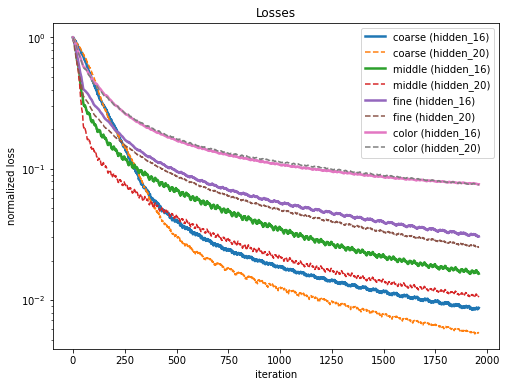

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open("./saved_slim/hidden_16/loss_record.pkl", "rb") as f:
    loss_record_16 = pickle.load(f)

with open("./saved_slim/hidden_20/loss_record.pkl", "rb") as f:
    loss_record_20 = pickle.load(f)

stages = ["coarse", "middle", "fine", "color"]

plt.figure(figsize=(8, 6))

running_avg_len = 40

for i, stage in enumerate(stages):
    # Plot the loss record for hidden_16
    smoothed_loss_16 = np.convolve(loss_record_16[stage], np.ones(running_avg_len)/running_avg_len, mode='valid')
    normalized_loss_16 = smoothed_loss_16 / np.max(smoothed_loss_16)
    plt.plot(normalized_loss_16, label=f"{stage} (hidden_16)", linestyle='-', linewidth=2.5)

    # Plot the loss record for hidden_20
    smoothed_loss_20 = np.convolve(loss_record_20[stage], np.ones(running_avg_len)/running_avg_len, mode='valid')
    normalized_loss_20 = smoothed_loss_20 / np.max(smoothed_loss_20)
    plt.plot(normalized_loss_20, label=f"{stage} (hidden_20)", linestyle='--')

plt.title('Losses')
plt.xlabel('iteration')
plt.ylabel('normalized loss')
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig('losses.pdf', format='pdf')
plt.show()


## Result on Replica-Room0

In [1]:
class Result:
    def __init__(self, traj_loss: dict, recon_acc, recon_cmpl, cmpl_ratio):
        self.traj_loss = dict()
        for k, v in traj_loss.items():
            self.traj_loss[k.split(".")[1]] = v
        self.recon_acc = recon_acc
        self.recon_cmpl = recon_cmpl
        self.cmpl_ratio = cmpl_ratio

    def __repr__(self):
        return f"Result({self.traj_loss}, {self.recon_acc}, {self.recon_cmpl}, {self.cmpl_ratio})"

org_result = Result({'absolute_translational_error.max': 0.08673449721250133,
 'absolute_translational_error.mean': 0.014039244812089938,
 'absolute_translational_error.median': 0.011910267427963656,
 'absolute_translational_error.min': 0.000665342672583704,
 'absolute_translational_error.rmse': 0.017056100758428155,
 'absolute_translational_error.std': 0.009685565455246237}, 2.8508039034974333, 2.810874999286849, 91.3975)

slim_20_result = Result(
    {'absolute_translational_error.max': 0.0781218155842711,
 'absolute_translational_error.mean': 0.01489622485651462,
 'absolute_translational_error.median': 0.012112372150520266,
 'absolute_translational_error.min': 0.0005275108304189101,
 'absolute_translational_error.rmse': 0.018438337792073392,
 'absolute_translational_error.std': 0.010866222230322634},
  2.747961594233303, 2.9628785125009696, 90.8295
)

slim_16_result = Result(
    {'absolute_translational_error.max': 0.06097557961288678,
 'absolute_translational_error.mean': 0.014875515192737453,
 'absolute_translational_error.median': 0.0126194880522115,
 'absolute_translational_error.min': 0.0013188807486168156,
 'absolute_translational_error.rmse': 0.01762571563005745,
 'absolute_translational_error.std': 0.00945435874199243},
 2.7314251355030477, 2.7297467112097484, 91.1205
)

Result({'max': 0.08673449721250133, 'mean': 0.014039244812089938, 'median': 0.011910267427963656, 'min': 0.000665342672583704, 'rmse': 0.017056100758428155, 'std': 0.009685565455246237}, 2.8508039034974333, 2.810874999286849, 91.3975)